In [ ]:
!pip install antspyx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 8.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ants
import os
from sklearn.metrics import *
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import *
from sklearn.decomposition import PCA

# Load Data



In [ ]:
carpeta_imagenes = "/content/drive/MyDrive/neurocon/"
archivos_en_carpeta = os.listdir(carpeta_imagenes)
archivos_nii = [archivo for archivo in archivos_en_carpeta if archivo.endswith(".nii.gz")]
tamaño_objetivo = (128, 128, 64)

arrays_imagenes = []

for archivo_nii in archivos_nii:
    ruta_completa = os.path.join(carpeta_imagenes, archivo_nii)
    img_ants = ants.image_read(ruta_completa)
    img_ants = ants.resample_image(img_ants, tamaño_objetivo, use_voxels=True)
    img_array = img_ants.numpy()
    arrays_imagenes.append(img_array)

imagenes_array = np.stack(arrays_imagenes, axis=0)

print(f'Tipo: {type(imagenes_array)}')
print(f'Shape: {imagenes_array.shape}')


Tipo: <class 'numpy.ndarray'>
Shape: (43, 128, 128, 64)


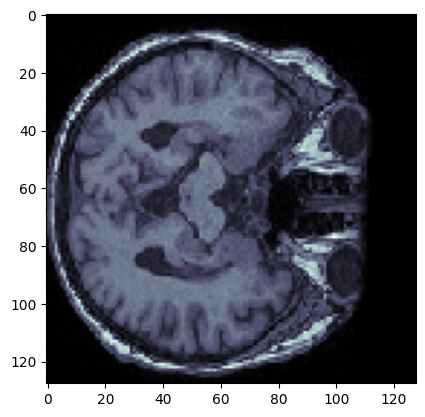

In [ ]:
plt.imshow(imagenes_array[42,:,:,32], cmap = 'bone')

# SVC

Precisión del SVM: 0.7777777777777778
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         6

    accuracy                           0.78         9
   macro avg       0.88      0.67      0.68         9
weighted avg       0.83      0.78      0.74         9



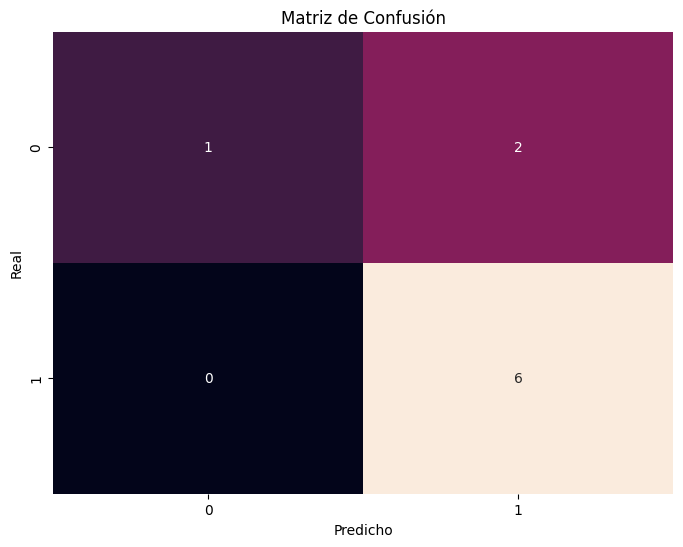

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

etiquetas = []
for archivo_nii in archivos_nii:
    if archivo_nii.startswith('sub-patient'):
        etiquetas.append(1)  # Etiqueta 1 para pacientes con Parkinson
    elif archivo_nii.startswith('sub-control'):
        etiquetas.append(0)  # Etiqueta 0 para pacientes de control

etiquetas = np.array(etiquetas)

# Aplanar cada imagen en un vector 1D
imagenes_aplanadas = imagenes_array.reshape((imagenes_array.shape[0], -1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes_aplanadas, etiquetas, test_size=0.2, random_state=42)

# Entrenar el clasificador SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predecir en el conjunto de prueba
predicciones = svm.predict(X_test)

# Calcular la precisión
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del SVM: {precision}")

# Reporte de clasificación
reporte = classification_report(y_test, predicciones)
print("Reporte de Clasificación:")
print(reporte)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Red Neuronal


Epoch 1/10
2/2 [==============================] - 7s 2s/step - loss: 3.3145 - accuracy: 0.6176 - val_loss: 64.7481 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 4s 2s/step - loss: 86.2727 - accuracy: 0.6176 - val_loss: 7.7966 - val_accuracy: 0.6667
Epoch 3/10
2/2 [==============================] - 5s 3s/step - loss: 56.5101 - accuracy: 0.6176 - val_loss: 18.7162 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 6s 3s/step - loss: 37.4947 - accuracy: 0.6176 - val_loss: 16.9634 - val_accuracy: 0.6667
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 29.5856 - accuracy: 0.6471 - val_loss: 12.5796 - val_accuracy: 0.6667
Epoch 6/10
2/2 [==============================] - 4s 2s/step - loss: 38.3491 - accuracy: 0.5882 - val_loss: 2.3026 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 5s 3s/step - loss: 19.0860 - accuracy: 0.6471 - val_loss: 3.2179 - val_accuracy: 0.3333
Epoch 8/10
2/2 [===============

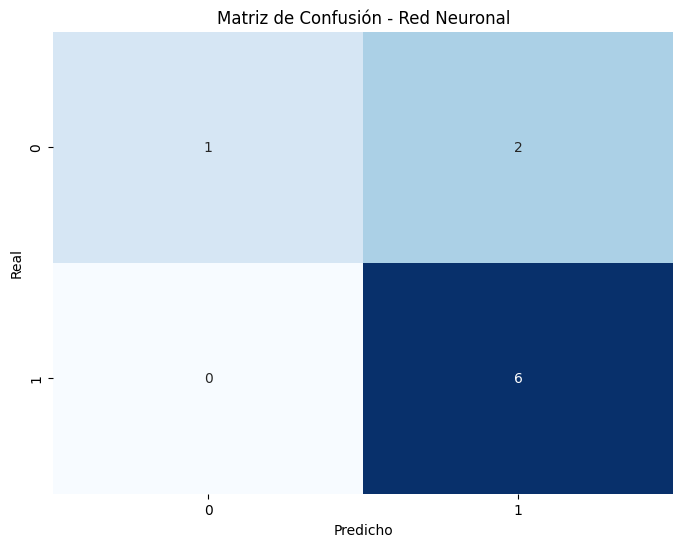

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Tu código para cargar las imágenes y obtener imagenes_array

# Etiquetar los datos
etiquetas = []
for archivo_nii in archivos_nii:
    if archivo_nii.startswith('sub-patient'):
        etiquetas.append(1)  # Etiqueta 1 para pacientes con Parkinson
    elif archivo_nii.startswith('sub-control'):
        etiquetas.append(0)  # Etiqueta 0 para pacientes de control

etiquetas = np.array(etiquetas)

# Aplanar cada imagen en un vector 1D
imagenes_aplanadas = imagenes_array.reshape((imagenes_array.shape[0], -1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes_aplanadas, etiquetas, test_size=0.2, random_state=42)

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Definir el modelo de red neuronal secuencial
modelo = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
puntuacion = modelo.evaluate(X_test, y_test)
print(f"Pérdida: {puntuacion[0]}")
print(f"Precisión: {puntuacion[1]}")

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()

#PCA

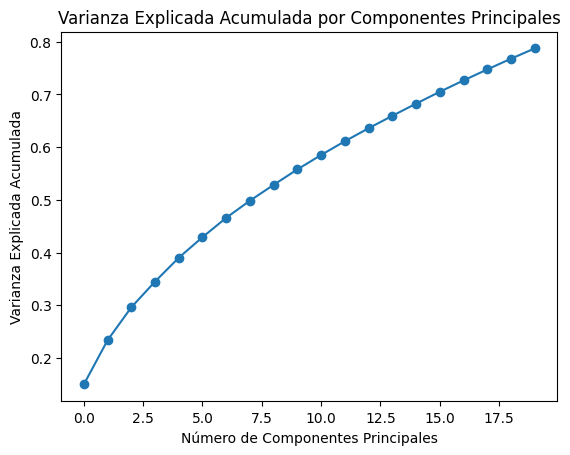

Epoch 1/10
2/2 [==============================] - 1s 182ms/step - loss: 7.1701 - accuracy: 0.3824 - val_loss: 2.1003 - val_accuracy: 0.5556
Epoch 2/10
2/2 [==============================] - 0s 36ms/step - loss: 7.5644 - accuracy: 0.3824 - val_loss: 1.2293 - val_accuracy: 0.5556
Epoch 3/10
2/2 [==============================] - 0s 33ms/step - loss: 4.9805 - accuracy: 0.3824 - val_loss: 1.2158 - val_accuracy: 0.7778
Epoch 4/10
2/2 [==============================] - 0s 32ms/step - loss: 2.9433 - accuracy: 0.5000 - val_loss: 1.1188 - val_accuracy: 0.7778
Epoch 5/10
2/2 [==============================] - 0s 30ms/step - loss: 2.1923 - accuracy: 0.5294 - val_loss: 1.1143 - val_accuracy: 0.7778
Epoch 6/10
2/2 [==============================] - 0s 33ms/step - loss: 2.6825 - accuracy: 0.5882 - val_loss: 1.1994 - val_accuracy: 0.7778
Epoch 7/10
2/2 [==============================] - 0s 32ms/step - loss: 2.6350 - accuracy: 0.4706 - val_loss: 1.2839 - val_accuracy: 0.6667
Epoch 8/10
2/2 [==========

In [23]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_componentes = 20
pca = PCA(n_components=num_componentes, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

plt.plot(varianza_explicada_acumulada, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.show()

modelo_pca = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

modelo_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

historia_pca = modelo_pca.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))

puntuacion_pca = modelo_pca.evaluate(X_test_pca, y_test)
print(f"Pérdida después de PCA: {puntuacion_pca[0]}")
print(f"Precisión después de PCA: {puntuacion_pca[1]}")